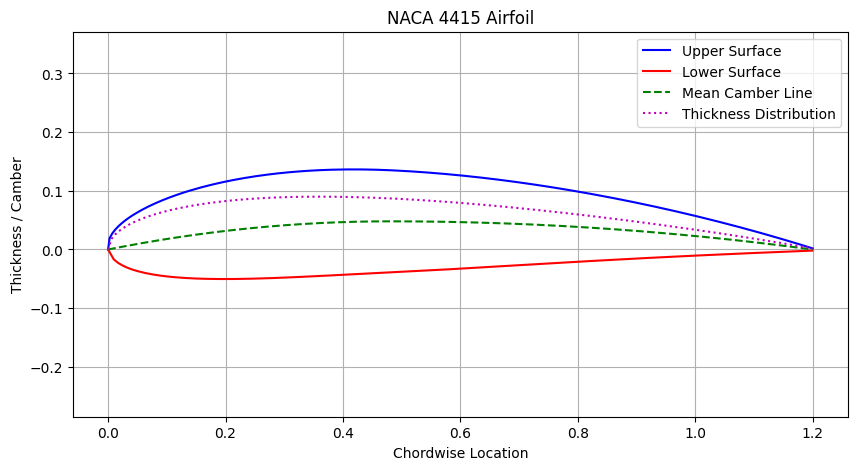

In [1]:
from airfoil.airfoil import NACA4

naca_4415 = NACA4("4415", chord_length=1.2, n_points=200)
naca_4415.plot(title="NACA 4415 Airfoil")

Downloaded b737d to C:\Users\Arkadiusz Drabik\Desktop\Nowy folder\code\repos\OpenFOAM_airfoil\input\airfoils\b737d.dat


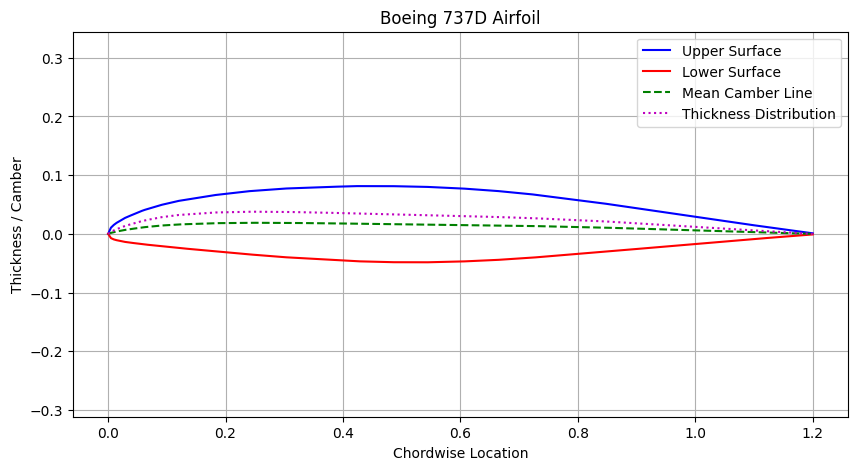

In [1]:
from airfoil.airfoil import UIUCAirfoil

b737d = UIUCAirfoil("b737d", chord_length=1.2, n_points=250)
b737d.plot(title="Boeing 737D Airfoil")